# Project 2: Ames Iowa Housing Prices Analysis - by Elton Yeo, DSI13


## Problem Statement

To predict housing prices in Ames, Iowa, by understanding the relationships among various variables such as lot area, neighbourhood etc., and using a linear regression model to predict the prices. 

This will allow prospective home-owners to better manage their cashflow when preparing to buy a house, and policy-makers to better monitor and regulate housing prices. 

## Contents:
- [Data Import](#Data-Import)
- [Exploratory Data Analysis and Cleaning](#Exploratory-Data-Analysis-and-Cleaning)
    - [Data Dictionary](#Data-Dictionary)
- [Data Visualisation](#Data-Visualisation)
- [Feature Engineering](#Feature-Engineering)
- [Modelling](#Modelling)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

*All libraries used are added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\elton\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Import

#### Read In Train and Test Data

Read in the train and test files and assign them to appropriately named pandas dataframes.

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
#Adding original column to each dataset for identification and combination
train['original'] = 'train'
test['original'] = 'test'
print(train.shape, test.shape)

(2051, 82) (879, 81)


In [4]:
#combining datasets before performing EDA and data cleaning
combined = pd.concat([train, test])
combined.shape

(2930, 82)

## Exploratory Data Analysis and Cleaning

#### Display Data

Viewing data to understand them.

In [5]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 878
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style    

In [6]:
combined.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature Misc Val  \
0       IR1          Lvl  ...         0     NaN   NaN          NaN        0   
1       IR1          Lvl  ...         0     NaN   NaN          NaN        0   
2       Reg          Lvl  ...         0     NaN   NaN          NaN        0   
3       Reg          Lvl  ...         0     NaN   NaN          NaN        0   
4       IR1          Lvl  ...         0     NaN   NaN          NaN        0   

  Mo Sold Yr Sold Sale Type  SalePrice  original  
0       3    2010       WD    130500.0     train  
1       4    2009       WD    220000.0     train  
2       1    2010       WD    109000.0     train  
3       4    2010       WD    174000.0     train  
4       3    2010       WD    138500.0     train  

[5 rows x 82 columns]

In [7]:
combined.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 39 columns]

Describing data: There are 81 columns inclusive of the `saleprice` (and excluding `original` which is just an identifier which will be removed later; the `original` column will **not** be analysed or visualised in the rest of the project). There appears to be many columns with missing values. The column names are also named in a confusing manner with spaces and uppercase letters.

We will standardise the column names, replacing the spaces with underscores, and converting all letters to lowercase. 

Therefter, we will divide the variables according to whether they are numerical (discrete or continuous), cateogorical (nominal) or ordinal. In each set of data, we will deal with missing values accordingly. For ordinal varaibles in particular, we will order them numerically i.e. "NA", "bad", "good", "excellent" will be "0", "1", "2", and "3". 


In [8]:
#viewing the current column names
combined.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
#standardising column names, replacing the spaces with underscores
#...and converting all letters to lowercase 
combined.columns = combined.columns.str.replace(' ', '_').str.lower()

In [10]:
#confirming that all column names have been changed
combined.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

#### Data Dictionary

Generating a quick guide to all the current data.

|S/N|Feature|DataType|Type|Description|
|---|---|---|---|---|
|0|id|int64|Discrete|Observation number|
|1|pid|int64|nominal|Parcel identification number  - can be used with city web site for parcel review.|
|2|ms_subclass|int64|nominal|Identifies the type of dwelling involved in the sale.|
|3|ms_zoning|object|nominal|Identifies the general zoning classification of the sale.|
|4|lot_frontage|float64|Continuous|Linear feet of street connected to property.|
|5|lot_area|int64|Continuous|Lot size in square feet|
|6|street|object|nominal|Type of road access to property.|
|7|alley|object|nominal|Type of alley access to property.|
|8|lot_shape|object|Ordinal|General shape of property.|
|9|land_contour|object|nominal|Flatness of the property.|
|10|utilities|object|Ordinal|Type of utilities available.|
|11|lot_config|object|nominal|Lot configuration.|
|12|land_slope|object|Ordinal|Slope of property.|
|13|neighborhood|object|nominal|Physical locations within Ames city limits.|
|14|condition_1|object|nominal|Proximity to various conditions.|
|15|condition_2|object|nominal|Proximity to various conditions (if more than one is present).|
|16|bldg_type|object|nominal|Type of dwelling.|
|17|house_style|object|nominal|Style of dwelling.|
|18|overall_qual|int64|Ordinal|Rates the overall material and finish of the house.|
|19|overall_cond|int64|Ordinal|Rates the overall condition of the house.|
|20|year_built|int64|Discrete|Original construction date.|
|21|year_remod/add|int64|Discrete|Remodel date (same as construction date if no remodeling or additions).|
|22|roof_style|object|nominal|Type of roof.|
|23|roof_matl|object|nominal|Roof material.|
|24|exterior_1st|object|nominal|Exterior covering on house.|
|25|exterior_2nd|object|nominal|Exterior covering on house (if more than one material).|
|26|mas_vnr_type|object|nominal|Masonry veneer type.|
|27|mas_vnr_area|float64|Continuous|Masonry veneer area in square feet.|
|28|exter_qual|object|Ordinal|Evaluates the quality of the material on the exterior.| 
|29|exter_cond|object|Ordinal|Evaluates the present condition of the material on the exterior.|
|30|foundation|object|nominal|Type of foundation.|
|31|bsmt_qual|object|Ordinal|Evaluates the height of the basement.|
|32|bsmt_cond|object|Ordinal|Evaluates the general condition of the basement.|
|33|bsmt_exposure|object|Ordinal|Refers to walkout or garden level walls.|
|34|bsmtfin_type_1|object|Ordinal|Rating of basement finished area.|
|35|bsmtfin_sf_1|float64|Continuous|Type 1 finished square feet.|
|36|bsmtfin_type_2|object|Ordinal|Rating of basement finished area (if multiple types).|
|37|bsmtfin_sf_2|float64|Continuous|Type 2 finished square feet.|
|38|bsmt_unf_sf|float64|Continuous|Unfinished square feet of basement area.|
|39|total_bsmt_sf|float64|Continuous|Total square feet of basement area.|
|40|heating|object|Nominal|Type of heating.|
|41|heating_qc|object|Ordinal|Heating quality and condition.|
|42|central_air|object|Nominal|Central air conditioning.|
|43|electrical|object|Ordinal|Electrical system.|
|44|1st_flr_sf|int64|Continuous|First Floor square feet.|
|45|2nd_flr_sf|int64|Continuous|Second floor square feet.|
|46|low_qual_fin_sf|int64|Continuous|Low quality finished square feet (all floors)|
|47|gr_liv_area|int64|Continuous|Above grade (ground) living area square feet.|
|48|bsmt_full_bath|float64|Discrete|Basement full bathrooms.|
|49|bsmt_half_bath|float64|Discrete|Basement half bathrooms.|
|50|full_bath|int64|Discrete|Full bathrooms above grade.|
|51|half_bath|int64|Discrete|Half baths above grade.|
|52|bedroom_abvgr|int64|Discrete|Bedrooms above grade (does NOT include basement bedrooms).|
|53|kitchen_abvgr|int64|Discrete|Kitchens above grade|
|54|kitchen_qual|object|Ordinal|Kitchen quality.|
|55|totrms_abvgrd|int64|Discrete|Total rooms above grade (does not include bathrooms).|
|56|functional|object|Ordinal|Home functionality (Assume typical unless deductions are warranted).|
|57|fireplaces|int64|Discrete|Number of fireplaces|
|58|fireplace_qu|object|Ordinal|Fireplace quality|
|59|garage_type|object|nominal|Garage location|
|60|garage_yr_blt|float64|Discrete|Year garage was built|
|61|garage_finish|object|Ordinal|Interior finish of the garage|
|62|garage_cars|float64|Discrete|Size of garage in car capacity|
|63|garage_area|float64|Continuous|Size of garage in square feet|
|64|garage_qual|object|Ordinal|Garage quality|
|65|garage_cond|object|Ordinal|Garage condition|
|66|paved_drive|object|Ordinal|Paved driveway|
|67|wood_deck_sf|int64|Continuous|Wood deck area in square feet|
|68|open_porch_sf|int64|Continuous|Open porch area in square feet|
|69|enclosed_porch|int64|Continuous|Enclosed porch area in square feet|
|70|3ssn_porch|int64|Continuous|Three season porch area in square feet|
|71|screen_porch|int64|Continuous|Screen porch area in square feet|
|72|pool_area|int64|Continuous|Pool area in square feet|
|73|pool_qc|object|Ordinal|Pool quality|
|74|fence|object|Ordinal|Fence quality|
|75|misc_feature|object|nominal|Miscellaneous feature not covered in other categories|
|76|misc_val|int64|Continuous|$Value of miscellaneous feature|
|77|mo_sold|int64|Discrete|Month Sold (MM)|
|78|yr_sold|int64|Discrete|Year Sold (YYYY)|
|79|sale_type|object|nominal|Type of sale|
|80|saleprice|int64|Continuous|Sale price|
|81|original|object|nominal|An internal identifier to help us tell the trainer set apart from the tester set. Will be removed later.|

#### Analysing variables with missing values

Finding the number and percentage of missing values for each variable. 

In [11]:
#displaying the number and percentage of missing values for each variable

#generate total number of missing values for each variable
total_null = combined.isnull().sum().sort_values(ascending=False)

#generate percentage of missing values for each variable
percent_null = (combined.isnull().sum()/combined.isnull().count()).sort_values(ascending=False)

#combine number and percentage of missing values for each variable
combined_null = pd.concat([total_null, percent_null], axis = 1, keys = ['total', 'percentage'])
combined_null.head(30)

total  percentage
pool_qc          2917    0.995563
misc_feature     2824    0.963823
alley            2732    0.932423
fence            2358    0.804778
fireplace_qu     1422    0.485324
saleprice         879    0.300000
lot_frontage      490    0.167235
garage_yr_blt     159    0.054266
garage_qual       159    0.054266
garage_finish     159    0.054266
garage_cond       159    0.054266
garage_type       157    0.053584
bsmt_exposure      83    0.028328
bsmtfin_type_2     81    0.027645
bsmtfin_type_1     80    0.027304
bsmt_cond          80    0.027304
bsmt_qual          80    0.027304
mas_vnr_area       23    0.007850
mas_vnr_type       23    0.007850
bsmt_half_bath      2    0.000683
bsmt_full_bath      2    0.000683
garage_area         1    0.000341
garage_cars         1    0.000341
bsmt_unf_sf         1    0.000341
bsmtfin_sf_2        1    0.000341
bsmtfin_sf_1        1    0.000341
total_bsmt_sf       1    0.000341
electrical          1    0.000341
year_built          0    0.000000
exterior_2nd        0    0.000000

#### Understanding Numerical (Discrete) Variables

|Feature|DataType|Type|Description|
|---|---|---|---|
|id|int64|Discrete|Observation number|
|year_built|int64|Discrete|Original construction date.|
|year_remod/add|int64|Discrete|Remodel date (same as construction date if no remodeling or additions).|
|bsmt_full_bath|float64|Discrete|Basement full bathrooms.|
|bsmt_half_bath|float64|Discrete|Basement half bathrooms.|
|full_bath|int64|Discrete|Full bathrooms above grade.|
|half_bath|int64|Discrete|Half baths above grade.|
|bedroom_abvgr|int64|Discrete|Bedrooms above grade (does NOT include basement bedrooms).|
|kitchen_abvgr|int64|Discrete|Kitchens above grade|
|totrms_abvgrd|int64|Discrete|Total rooms above grade (does not include bathrooms).|
|fireplaces|int64|Discrete|Number of fireplaces|
|garage_yr_blt|float64|Discrete|Year garage was built|
|garage_cars|float64|Discrete|Size of garage in car capacity|
|mo_sold|int64|Discrete|Month Sold (MM)|
|yr_sold|int64|Discrete|Year Sold (YYYY)|

There are 15 numerical variables which are discrete. Of these 15, 4 have missing values based on our previous table. They are `bsmt_full_bath`, `bsmt_half_bath`, `garage_yr_blt`, and `garage_cars`. 

#### Understanding Numerical (Continuous) Variables

|Feature|DataType|Type|Description|
|---|---|---|---|
|lot_frontage|float64|Continuous|Linear feet of street connected to property.|
|lot_area|int64|Continuous|Lot size in square feet|
|mas_vnr_area|float64|Continuous|Masonry veneer area in square feet.|
|bsmtfin_sf_1|float64|Continuous|Type 1 finished square feet.|
|bsmtfin_sf_2|float64|Continuous|Type 2 finished square feet.|
|bsmt_unf_sf|float64|Continuous|Unfinished square feet of basement area.|
|total_bsmt_sf|float64|Continuous|Total square feet of basement area.|
|1st_flr_sf|int64|Continuous|First Floor square feet.|
|2nd_flr_sf|int64|Continuous|Second floor square feet.|
|low_qual_fin_sf|int64|Continuous|Low quality finished square feet (all floors)|
|gr_liv_area|int64|Continuous|Above grade (ground) living area square feet.|
|garage_area|float64|Continuous|Size of garage in square feet|
|wood_deck_sf|int64|Continuous|Wood deck area in square feet|
|open_porch_sf|int64|Continuous|Open porch area in square feet|
|enclosed_porch|int64|Continuous|Enclosed porch area in square feet|
|3ssn_porch|int64|Continuous|Three season porch area in square feet|
|screen_porch|int64|Continuous|Screen porch area in square feet|
|pool_area|int64|Continuous|Pool area in square feet|
|misc_val|int64|Continuous|$Value of miscellaneous feature|
|saleprice|int64|Continuous|Sale price|

There are 20 numerical variables which are continuous. Of these 20, 7 have missing values based on our previous table. They are `lot_frontage`, `mas_vnr_area`, `bsmtfin_sf_1`, `bsmtfin_sf_2`, `bsmt_unf_sf`, `total_bsmt_sf`, `garage_area`.


#### Understanding Ordinal Variables

|Feature|DataType|Type|Description|
|---|---|---|---|
|lot_shape|object|Ordinal|General shape of property.|
|utilities|object|Ordinal|Type of utilities available.|
|land_slope|object|Ordinal|Slope of property.|
|overall_qual|int64|Ordinal|Rates the overall material and finish of the house.|
|overall_cond|int64|Ordinal|Rates the overall condition of the house.|
|exter_qual|object|Ordinal|Evaluates the quality of the material on the exterior.| 
|exter_cond|object|Ordinal|Evaluates the present condition of the material on the exterior.|
|bsmt_qual|object|Ordinal|Evaluates the height of the basement.|
|bsmt_cond|object|Ordinal|Evaluates the general condition of the basement.|
|bsmt_exposure|object|Ordinal|Refers to walkout or garden level walls.|
|bsmtfin_type_1|object|Ordinal|Rating of basement finished area.|
|bsmtfin_type_2|object|Ordinal|Rating of basement finished area (if multiple types).|
|heating_qc|object|Ordinal|Heating quality and condition.|
|electrical|object|Ordinal|Electrical system.|
|kitchen_qual|object|Ordinal|Kitchen quality.|
|functional|object|Ordinal|Home functionality (Assume typical unless deductions are warranted).|
|fireplace_qu|object|Ordinal|Fireplace quality|
|garage_finish|object|Ordinal|Interior finish of the garage|
|garage_qual|object|Ordinal|Garage quality|
|garage_cond|object|Ordinal|Garage condition|
|paved_drive|object|Ordinal|Paved driveway|
|pool_qc|object|Ordinal|Pool quality|
|fence|object|Ordinal|Fence quality|


There are 23 ordinal variables. Of these 23, 11 have missing values based on our previous table. They are `bsmt_qual`, `bsmt_cond`, `bsmt_exposure`, `bsmtfin_type_1`, `bsmtfin_type_2`, `fireplace_qu`, `garage_finish`, `garage_qual`, `garage_cond`, `pool_qc`, `fence`, `electrical`.

#### Ordering ordinal variables numerically

We will order **all** ordinal variables numerically so that we can easily analyse and deal with them in our model later. 

In [12]:
#created a loop for ordinal variables with similar categories within,
#... to make it easier to order these variables numerically

#creating list of variables
ordinal_five = ['exter_qual', 'exter_cond', 'heating_qc', 'kitchen_qual']

#looping through list of variables to order their categories numerically
for x in ordinal_five:
    combined[x].replace({'Po': 0,
                'Fa': 1, 
                'TA': 2,
                'Gd': 3,
                'Ex': 4}, inplace=True)
    
    print(combined[x].value_counts())

2    1799
3     989
4     107
1      35
Name: exter_qual, dtype: int64
2    2549
3     299
1      67
4      12
0       3
Name: exter_cond, dtype: int64
4    1495
2     864
3     476
1      92
0       3
Name: heating_qc, dtype: int64
2    1494
3    1160
4     205
1      70
0       1
Name: kitchen_qual, dtype: int64


In [13]:
#created a loop for ordinal variables with similar categories within,
#... to make it easier to order these variables numerically

#creating list of variables
ordinal_six = ['bsmt_qual', 'bsmt_cond', 'fireplace_qu', 'garage_qual', 'garage_cond']

#looping through list of variables to order their categories numerically
for x in ordinal_six:
    combined[x].replace({'Na': 1, 
                      'Po': 2,
                        'Fa': 3, 
                        'TA': 4,
                        'Gd': 5,
                        'Ex': 6}, inplace=True)
    
    print(combined[x].value_counts())

4.0    1283
5.0    1219
6.0     258
3.0      88
2.0       2
Name: bsmt_qual, dtype: int64
4.0    2616
5.0     122
3.0     104
2.0       5
6.0       3
Name: bsmt_cond, dtype: int64
5.0    744
4.0    600
3.0     75
2.0     46
6.0     43
Name: fireplace_qu, dtype: int64
4.0    2615
3.0     124
5.0      24
2.0       5
6.0       3
Name: garage_qual, dtype: int64
4.0    2665
3.0      74
5.0      15
2.0      14
6.0       3
Name: garage_cond, dtype: int64


In [14]:
#displaying current categories in bsmt_exposure

feature = combined.bsmt_exposure

feature.value_counts()

No    1906
Av     418
Gd     284
Mn     239
Name: bsmt_exposure, dtype: int64

In [15]:
#ordering bsmt_exposure numerically

feature.replace({'NA': 0, 
                'No': 1,
                'Mn': 2, 
                'Av': 3,
                'Gd': 4}, inplace=True)

feature.value_counts()

1.0    1906
3.0     418
4.0     284
2.0     239
Name: bsmt_exposure, dtype: int64

In [16]:
#displaying current categories in bsmtfin_type_1

feature = combined.bsmtfin_type_1

feature.value_counts()

GLQ    859
Unf    851
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: bsmtfin_type_1, dtype: int64

In [17]:
#ordering bsmtfin_type_1 numerically

feature.replace({'NA': 0, 
                'Unf': 1,
                'LwQ': 2, 
                'Rec': 3,
                'BLQ': 4,
                'ALQ': 5,
                'GLQ': 6}, inplace=True)

feature.value_counts()

6.0    859
1.0    851
5.0    429
3.0    288
4.0    269
2.0    154
Name: bsmtfin_type_1, dtype: int64

In [18]:
#displaying current categories in bsmtfin_type_2

feature = combined.bsmtfin_type_2

feature.value_counts()

Unf    2499
Rec     106
LwQ      89
BLQ      68
ALQ      53
GLQ      34
Name: bsmtfin_type_2, dtype: int64

In [19]:
#ordering bsmtfin_type_2 numerically

feature.replace({'NA': 0, 
                'Unf': 1,
                'LwQ': 2, 
                'Rec': 3,
                'BLQ': 4,
                'ALQ': 5,
                'GLQ': 6}, inplace=True)

feature.value_counts()

1.0    2499
3.0     106
2.0      89
4.0      68
5.0      53
6.0      34
Name: bsmtfin_type_2, dtype: int64

In [20]:
#displaying current categories in garage_finish

feature = combined.garage_finish

feature.value_counts()

Unf    1231
RFn     812
Fin     728
Name: garage_finish, dtype: int64

In [21]:
#ordering garage_finish numerically

feature.replace({'NA': 0, 
                'Unf': 1,
                'RFn': 2, 
                'Fin': 3}, inplace=True)

feature.value_counts()

1.0    1231
2.0     812
3.0     728
Name: garage_finish, dtype: int64

In [22]:
#displaying current categories in pool_qc

feature = combined.pool_qc

feature.value_counts()

Ex    4
Gd    4
TA    3
Fa    2
Name: pool_qc, dtype: int64

In [23]:
#ordering pool_qc numerically

feature.replace({'NA': 0,
                'Fa': 1, 
                'TA': 2,
                'Gd': 3,
                'Ex': 4}, inplace=True)

feature.value_counts()

4.0    4
3.0    4
2.0    3
1.0    2
Name: pool_qc, dtype: int64

In [24]:
#displaying current categories in fence

feature = combined.fence

feature.value_counts()

MnPrv    330
GdPrv    118
GdWo     112
MnWw      12
Name: fence, dtype: int64

In [25]:
#ordering fence numerically

feature.replace({'NA': 0,
                'MnWw': 1, 
                'GdWo': 2,
                'MnPrv': 3,
                'GdPrv': 4}, inplace=True)

feature.value_counts()

3.0    330
4.0    118
2.0    112
1.0     12
Name: fence, dtype: int64

In [26]:
#displaying current categories in lot_shape

feature = combined.lot_shape

feature.value_counts()

Reg    1859
IR1     979
IR2      76
IR3      16
Name: lot_shape, dtype: int64

In [27]:
#ordering lot_shape numerically

feature.replace({'IR3': 0, 
                 'IR2': 1,
                'IR1': 2, 
                'Reg': 3}, inplace=True)

feature.value_counts()

3    1859
2     979
1      76
0      16
Name: lot_shape, dtype: int64

In [28]:
#displaying current categories in utilities

feature = combined.utilities

feature.value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: utilities, dtype: int64

In [29]:
#ordering utilities numerically

feature.replace({'ELO': 0,
                'NoSeWa': 1, 
                'NoSewr': 2,
                'AllPub': 3}, inplace=True)

feature.value_counts()

3    2927
2       2
1       1
Name: utilities, dtype: int64

In [30]:
#displaying current categories in land_slope

feature = combined.land_slope

feature.value_counts()

Gtl    2789
Mod     125
Sev      16
Name: land_slope, dtype: int64

In [31]:
#ordering land_slope numerically

feature.replace({'Sev': 0,
                'Mod': 1, 
                'Gtl': 2}, inplace=True)

feature.value_counts()

2    2789
1     125
0      16
Name: land_slope, dtype: int64

In [32]:
#overall_qual is already ordered numerically, so no changes needed

feature = combined.overall_qual

feature.value_counts()

5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: overall_qual, dtype: int64

In [33]:
#overal_cond is already ordered numerically so no changes needed

feature = combined.overall_cond

feature.value_counts()

5    1654
6     533
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: overall_cond, dtype: int64

In [34]:
#displaying current categories in electrical

feature = combined.electrical

feature.value_counts()

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: electrical, dtype: int64

In [35]:
#ordering electrical numerically

feature.replace({'Mix': 0,
                'FuseP': 1, 
                'FuseF': 2,
                'FuseA': 3,
                'SBrkr': 4}, inplace=True)

feature.value_counts()

4.0    2682
3.0     188
2.0      50
1.0       8
0.0       1
Name: electrical, dtype: int64

In [36]:
#displaying current categories in functional

feature = combined.functional

feature.value_counts()

Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sal        2
Sev        2
Name: functional, dtype: int64

In [37]:
#ordering functional numerically

feature.replace({'Sal': 0,
                'Sev': 1, 
                'Maj2': 2,
                'Maj1': 3,
                'Mod': 4,
                'Min2': 5,
                'Min1': 6,
                'Typ': 7}, inplace=True)

feature.value_counts()

7    2728
5      70
6      65
4      35
3      19
2       9
1       2
0       2
Name: functional, dtype: int64

In [38]:
#displaying current categories in paved_drive

feature = combined.paved_drive

feature.value_counts()

Y    2652
N     216
P      62
Name: paved_drive, dtype: int64

In [39]:
#ordering paved_drive numerically

feature.replace({'N': 0,
                'P': 1, 
                'Y': 2}, inplace=True)

feature.value_counts()

2    2652
0     216
1      62
Name: paved_drive, dtype: int64

#### Understanding Categorical (Nominal) Variables

|Feature|DataType|Type|Description|
|---|---|---|---|
|pid|int64|nominal|Parcel identification number  - can be used with city web site for parcel review.|
|ms_subclass|int64|nominal|Identifies the type of dwelling involved in the sale.|
|ms_zoning|object|nominal|Identifies the general zoning classification of the sale.|
|street|object|nominal|Type of road access to property.|
|alley|object|nominal|Type of alley access to property.|
|land_contour|object|nominal|Flatness of the property.|
|lot_config|object|nominal|Lot configuration.|
|neighborhood|object|nominal|Physical locations within Ames city limits.|
|condition_1|object|nominal|Proximity to various conditions.|
|condition_2|object|nominal|Proximity to various conditions (if more than one is present).|
|bldg_type|object|nominal|Type of dwelling.|
|house_style|object|nominal|Style of dwelling.|
|roof_style|object|nominal|Type of roof.|
|roof_matl|object|nominal|Roof material.|
|exterior_1st|object|nominal|Exterior covering on house.|
|exterior_2nd|object|nominal|Exterior covering on house (if more than one material).|
|mas_vnr_type|object|nominal|Masonry veneer type.|
|foundation|object|nominal|Type of foundation.|
|heating|object|Nominal|Type of heating.|
|central_air|object|Nominal|Central air conditioning.|
|garage_type|object|nominal|Garage location|
|misc_feature|object|nominal|Miscellaneous feature not covered in other categories|
|sale_type|object|nominal|Type of sale|


There are 23 nominal variables. Of these 23, 4 have missing values based on our previous table. They are `alley`, `mas_vnr_type`, `garage_type`, `misc_feature`.

#### Converting selected categorical variables to strings

Two variables, `pid` and `ms_subclass` have integer datatypes, but should be object datatypes since they are categorical variables and the numbers do not have numerical order or meaning; they are only used as identifiers for the specified categories. Therefore, we will convert their values to strings. 

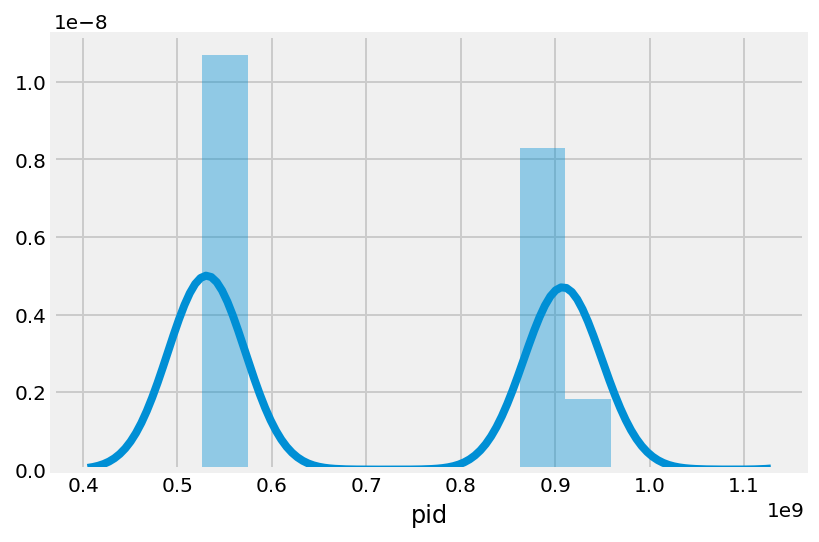

In [40]:
#converting pid values to strings

#the histogram below shows that there are two categories for pid:
#those below 600000000 and those above 800000000
sns.distplot(combined['pid'])

In [41]:
#creating two categories for the pid values, 'zero' if x is less than 600000000, 
#... and 'one' if x is above 800000000

#combined['pid'] = ['zero' if x < 600000000 else 'one' for x in combined['pid'] ]

In [42]:
#confirming that the two categories have been created

combined['pid'].value_counts()

532351060    1
905377130    1
909250210    1
902301030    1
534127080    1
            ..
908225170    1
533120030    1
528104080    1
528477070    1
533250050    1
Name: pid, Length: 2930, dtype: int64

In [43]:
#converting ms_subclass values to strings

#displaying categories and value counts in ms_subclass
feature = combined.ms_subclass
feature.value_counts()

20     1079
60      575
50      287
120     192
30      139
160     129
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: ms_subclass, dtype: int64

In [44]:
#renaming the categories in ms_subclass

feature.replace({20: 'twenty',
                30: 'thirty', 
                40: 'forty',
                45: 'fortyfive',
                50: 'fifty',
                60: 'sixty',
                70: 'seventy',
                75: 'seventyfive',
                80: 'eighty',
                85: 'eightyfive',
                90: 'ninety',
                120: 'hundredtwenty',
                150: 'hundredfifty',
                160: 'hundredsixty',
                180: 'hundredeighty',
                190: 'hundredninety'}, inplace=True)

feature.value_counts()

twenty           1079
sixty             575
fifty             287
hundredtwenty     192
thirty            139
hundredsixty      129
seventy           128
eighty            118
ninety            109
hundredninety      61
eightyfive         48
seventyfive        23
fortyfive          18
hundredeighty      17
forty               6
hundredfifty        1
Name: ms_subclass, dtype: int64

#### Addressing missing values

For all **categorical variables**, will assume that where there are missing values in these columns, it is because there are no alleys, masonry, garages or misc features associated with that house. Therefore, all missing values will be filled with "none".

In [45]:
#filling in missing values in categorical variables with "none"

change_nom_na = ['alley', 
             'mas_vnr_type', 
             'garage_type', 
             'misc_feature']

for x in change_nom_na:
    combined[x].fillna('none', inplace = True)
    print(combined[x].value_counts())

none    2732
Grvl     120
Pave      78
Name: alley, dtype: int64
None       1752
BrkFace     880
Stone       249
BrkCmn       25
none         23
CBlock        1
Name: mas_vnr_type, dtype: int64
Attchd     1731
Detchd      782
BuiltIn     186
none        157
Basment      36
2Types       23
CarPort      15
Name: garage_type, dtype: int64
none    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: misc_feature, dtype: int64


For all **numerical variables (discrete, continuous, and now inclusive of the ordinal)**, we assume that where there are missing values in these columns, it is because there are no such features associated with that house. Therefore, all missing values will be filled with "0".

In [46]:
#filling in missing values in numerical variables with "0"

combined._get_numeric_data().fillna(0, inplace=True)

In [47]:
#confirming that there are no more missing values in the train dataset

total_null = combined.isnull().sum().sort_values(ascending=False)
percent_null = (combined.isnull().sum()/combined.isnull().count()).sort_values(ascending=False)
combined_null = pd.concat([total_null, percent_null], axis = 1, keys = ['total', 'percentage'])
combined_null.head()

total  percentage
original          0         0.0
year_built        0         0.0
roof_style        0         0.0
roof_matl         0         0.0
exterior_1st      0         0.0

### Feature Engineering

Next, we will combine variables which are similar. There is a high level of specificity for some variables, which would not be necessary for our analysis e.g. there is no need to differentiate among the different types of porches, what is important is whether or not the house has a porch. 

In [48]:
#combining porch variables since all we need to know is whether there is a porch or not

combined['porch'] = combined['open_porch_sf']+combined['enclosed_porch']+combined['3ssn_porch']+combined['screen_porch']
combined['porch'] = combined['porch'].astype(bool).astype(int)

combined['porch'].value_counts()

1    2055
0     875
Name: porch, dtype: int64

In [49]:
#combining Full Bath and Bsmt Full Baths as just one single full bath
#combining Half Bath and Bsmt Half Bath to just one single half bath
#this is because it does not matter where the full or half baths are located within the house
combined['full_bath'] = combined['full_bath'] + combined['bsmt_full_bath']
combined['half_bath'] = combined['half_bath'] + combined['bsmt_half_bath']

In [50]:
#combining  all square footage variables into one 
#...since we do not need to know the specific square footage for 
#... the 1st flr, 2nd flr and basement, just the overall for the house

combined['total_sf'] = combined['1st_flr_sf'] + combined['2nd_flr_sf'] + combined['total_bsmt_sf']

In [51]:
#combining  all room above ground variables into one 
#... since what matters is that all these rooms in the house
#... are above ground

combined['total_rooms'] = combined['bedroom_abvgr'] + combined['totrms_abvgrd']

In [52]:
#checking the current number of columns
combined.shape

(2930, 85)

In [53]:
#removing the columns which we had used to engineer new variabless
drop_col = ['bsmt_full_bath','bsmt_half_bath', '3ssn_porch', 
            'enclosed_porch', 'open_porch_sf','screen_porch',
           '1st_flr_sf','2nd_flr_sf','total_bsmt_sf',
           'bedroom_abvgr','totrms_abvgrd']
combined.drop(drop_col, axis=1, inplace=True)
combined.shape

(2930, 74)

### Data Visualisation

#### Visualising numerical variables

For numerical variables, we will look use histograms to undestand the distribution and scatter plots (of variable against sale price) to observe patterns and possible outliers.

In [54]:
#creating function to plot histograms for each numerical variable
def subplot_histograms(dataframe, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize = (10,200)) 
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], ax=ax[i])
        ax[i].set_xlabel(list_of_columns[i])

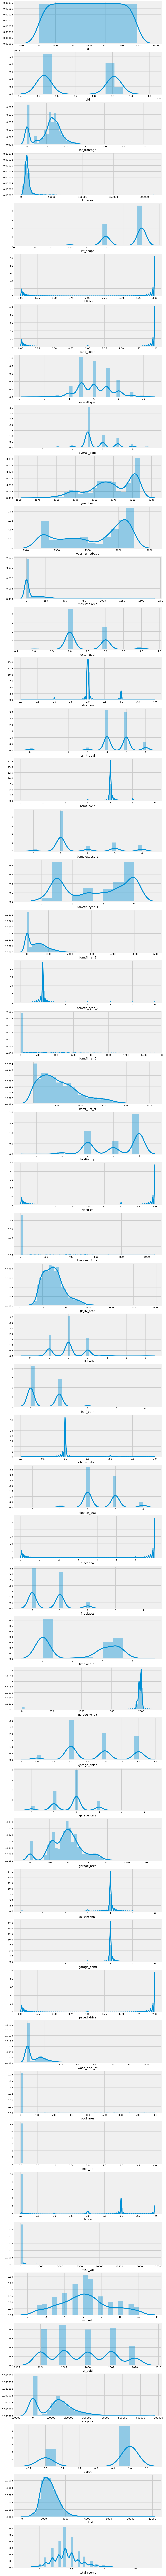

In [55]:
subplot_histograms(combined, combined._get_numeric_data().columns)

In [56]:
#creating function to plot scatterplots for each numerical variable against saleprice
def subplot_scatterplots(dataframe, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize = (10,200)) 
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.scatterplot(dataframe[column], dataframe['saleprice'], ax=ax[i])
        ax[i].set_xlabel(list_of_columns[i])

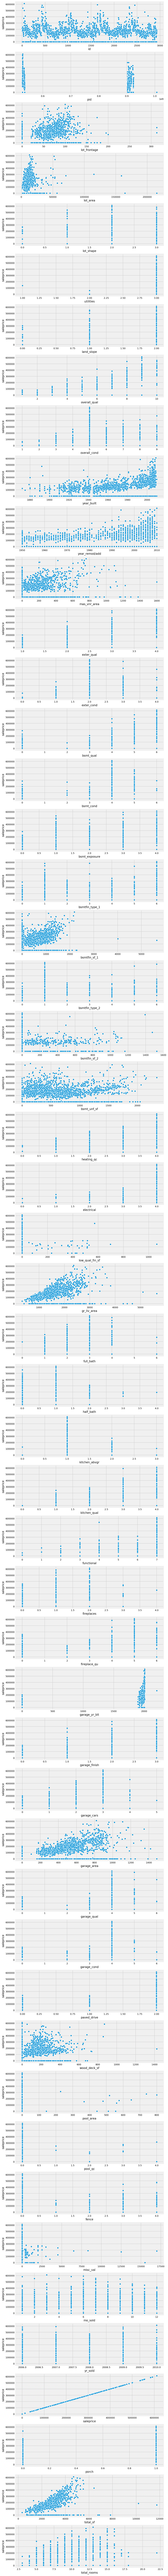

In [57]:
subplot_scatterplots(combined, combined._get_numeric_data().columns)

**Describing numerical variables from visualisations**:

The majority of the numerical variables have multimodal distributions. A summary of the distributions is provided below. 

From the scatterplots, there is an outlier in garage_yr_built which is impossible since the year is in the future. We will deal with this outlier later. 

*Uniformed distribution*: 
- id

*Bimodal distribution*: 
- pid
- lot_frontage
- porch

*Multimodal distribution*: 
- lot_shape
- utilities
- land_slope
- overall_qual
- overall_cond
- year_built
- year_remod/add
- exter_qual
- exter_cond
- bsmt_qual
- bsmt_cond
- bsmt_exposure
- bsmtfin_type_1
- bsmt_sf_1
- bsmt_type_2
- bsmtfin_type_2
- heating_qc
- electrical
- full_bath
- half_bath
- kitchen_abvgr
- kitchen_qual
- functional
- fireplaces
- fireplace_qu
- garage_finish
- garage_cars
- garage_area
- paved_drive
- fence
- mo_sold
- yr_sold
- total_rooms

*Unimodal distribution with right skew*: 
- lot_area
- mas_vnr_area
- bsmt_unf_sf
- low_qual_fin_sf,
- gr_liv_area
- wood_deck_sf
- pool_area
- pool_qc
- misc_val
- saleprice (excluding the test set)
- total_sf

*Unimodal distribution with left skew*: 
- garage_yr_built
- garage_qual
- garage_cond

#### Visualising categorical variables

In [58]:
#extracting all categorical variables
cat_var = combined.select_dtypes(exclude=[np.number])
cat_features = cat_var.columns

#creating function to plot boxplots for each categorical variable against saleprice
def subplot_boxplots(dataframe, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize = (15,150)) 
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(dataframe['saleprice'], dataframe[column], ax=ax[i])
        ax[i].set_ylabel(list_of_columns[i])


In [59]:
combined

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
0     109  533352170       sixty        RL           0.0     13517   Pave   
1     544  531379050       sixty        RL          43.0     11492   Pave   
2     153  535304180      twenty        RL          68.0      7922   Pave   
3     318  916386060       sixty        RL          73.0      9802   Pave   
4     255  906425045       fifty        RL          82.0     14235   Pave   
..    ...        ...         ...       ...           ...       ...    ...   
874  1662  527377110       sixty        RL          80.0      8000   Pave   
875  1234  535126140       sixty        RL          90.0     14670   Pave   
876  1373  904100040      twenty        RL          55.0      8250   Pave   
877  1672  527425140      twenty        RL          60.0      9000   Pave   
878  1939  535327160      twenty        RL          70.0      8400   Pave   

    alley  lot_shape land_contour  ...  misc_feature misc_val  mo_sold  \
0    none          2          Lvl  ...          none        0        3   
1    none          2          Lvl  ...          none        0        4   
2    none          3          Lvl  ...          none        0        1   
3    none          3          Lvl  ...          none        0        4   
4    none          2          Lvl  ...          none        0        3   
..    ...        ...          ...  ...           ...      ...      ...   
874  none          3          Lvl  ...          none        0       11   
875  none          3          Lvl  ...          none        0        8   
876  none          3          Lvl  ...          none        0        8   
877  none          3          Lvl  ...          none        0        5   
878  none          3          Lvl  ...          none        0        3   

    yr_sold sale_type saleprice original porch  total_sf  total_rooms  
0      2010       WD   130500.0    train     1    2204.0            9  
1      2009       WD   220000.0    train     1    3035.0           12  
2      2010       WD   109000.0    train     1    2114.0            8  
3      2010       WD   174000.0    train     0    1828.0           10  
4      2010       WD   138500.0    train     1    2121.0            9  
..      ...       ...       ...      ...   ...       ...          ...  
874    2007       WD        0.0     test     1    2961.0           12  
875    2008       WD        0.0     test     1    3092.0           13  
876    2008       WD        0.0     test     1    2163.0            8  
877    2007       WD        0.0     test     0    1728.0            8  
878    2007       WD        0.0     test     0    1848.0            8  

[2930 rows x 74 columns]

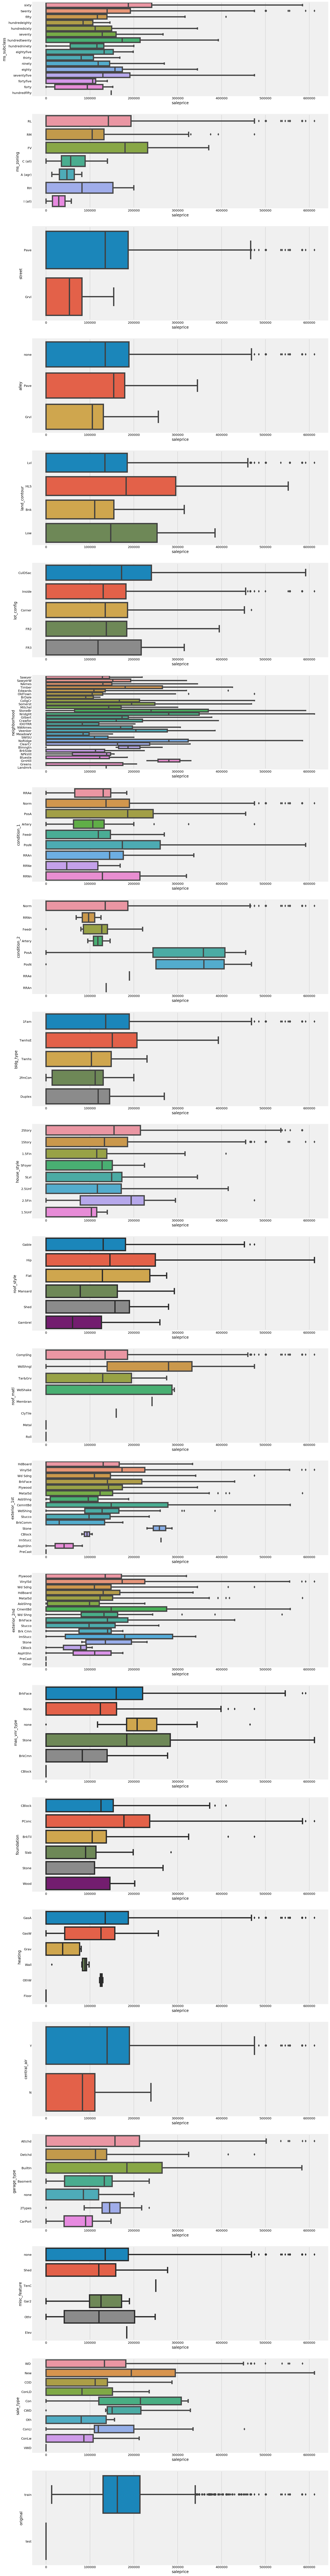

In [60]:
subplot_boxplots(combined, cat_var.columns)

From the boxplots, we can tell that most of the cateogorical variables are found within the lower end of sale prices i.e. less than $300,000. If there are any anomalies as we further analyse the data, we can refer to these boxplots to help us understand the distribution of each category within these variables. 

#### Addressing outliers

We will fix the outlier which we had earlier found using our scatterplot. 

In [61]:
#in garage_yr_built, there is one outlier in the scatterplot
#it is an impossible value because the year is in the future 

#confirming the outlier value
combined['garage_yr_blt'][combined['garage_yr_blt'] > 2020]

1699    2207.0
Name: garage_yr_blt, dtype: float64

In [62]:
#the year will be changed from 2207 to 2007,
#... which is a more likely year given the other years in the column

combined['garage_yr_blt'] = combined['garage_yr_blt'].replace({2207: 2007})

In [63]:
#confirming that the year 2207 has been replaced

combined['garage_yr_blt'][combined['garage_yr_blt'] > 2020]

Series([], Name: garage_yr_blt, dtype: float64)

#### Dropping categorical variables with mode > 80%

We will drop categorical variables with mode >80%. This is because there is much less variance and hence such categorical variables will not have significant impact on the model.


In [64]:
print('Total of categorical features: ', len(cat_features))

Total of categorical features:  23


In [65]:
# percentage of frequenct of highest value in categorical variables 
for i in list(cat_features):
    pct = combined[i].value_counts()[0] / 2930
    print('Highest value Percentage of {}: {:3f}'.format(i, pct))

Highest value Percentage of ms_subclass: 0.368259
Highest value Percentage of ms_zoning: 0.775768
Highest value Percentage of street: 0.995904
Highest value Percentage of alley: 0.932423
Highest value Percentage of land_contour: 0.898635
Highest value Percentage of lot_config: 0.730375
Highest value Percentage of neighborhood: 0.151195
Highest value Percentage of condition_1: 0.860751
Highest value Percentage of condition_2: 0.989761
Highest value Percentage of bldg_type: 0.827645
Highest value Percentage of house_style: 0.505461
Highest value Percentage of roof_style: 0.792150
Highest value Percentage of roof_matl: 0.985324
Highest value Percentage of exterior_1st: 0.350171
Highest value Percentage of exterior_2nd: 0.346416
Highest value Percentage of mas_vnr_type: 0.597952
Highest value Percentage of foundation: 0.447099
Highest value Percentage of heating: 0.984642
Highest value Percentage of central_air: 0.933106
Highest value Percentage of garage_type: 0.590785
Highest value Perce

In [66]:
# dropping columns which have frequency of value more than 80% of all values 

col_drop = ['street', 'alley', 'land_contour', 'condition_1', 'condition_2', 
            'bldg_type', 'roof_matl', 'heating', 'central_air', 
            'misc_feature', 'sale_type']

combined.drop(col_drop, axis=1, inplace=True)

#confirming that the total number of features are reduced after dropping the above columns
combined.shape

(2930, 63)

#### Fixing saleprice by logging it because it is not normal 

Looking at the distribution of saleprice (which is only found in the train set) below, we can see that it is a unimodal distribution with a right skew. Since this is our target variable, we will log transform it fit it into a normal distribution. This will correct the skewness of the distribution and allow it to be modelled more easily later. To confirm that the transformed variable is normally distributed, we look at the skewness and kurtosis, which should be close to 0. 

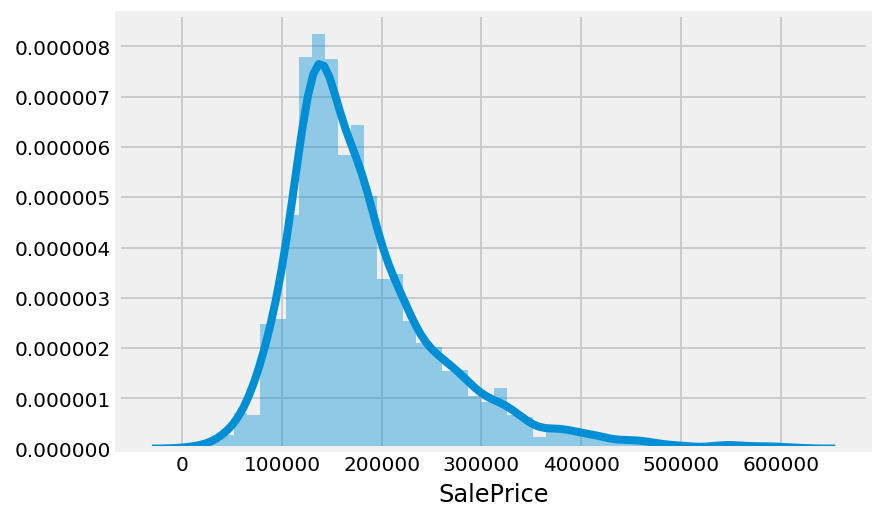

In [67]:
#displaying distribution of SalePrice in the train set
sns.distplot(train['SalePrice'])

In [68]:
# finding the skewness of SalePrice in the train set
train.SalePrice.skew()

1.5575514385863427

In [69]:
# finding the kurtosis of SalePrice in the train set
train.SalePrice.kurt()

3.579003386146362

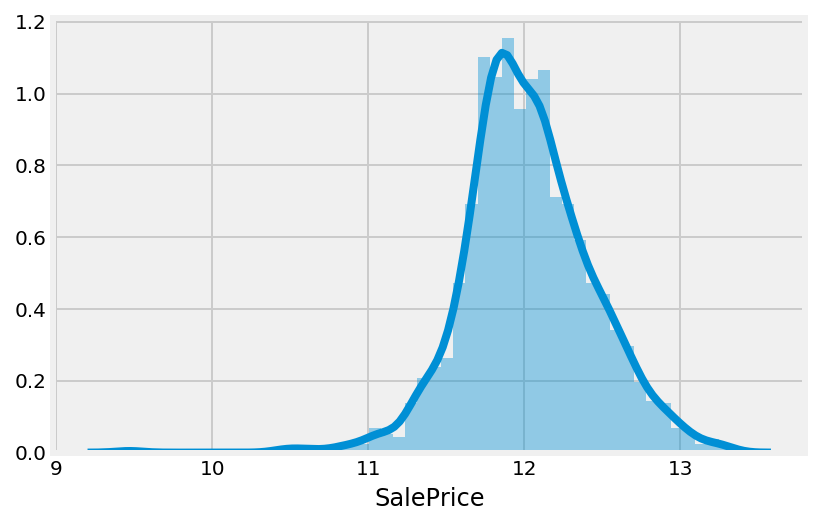

In [70]:
#displaying distribution of log-transformed SalePrice 
sns.distplot(np.log(train['SalePrice']))

In [71]:
#finding the skewness of log-transformed SalePrice 
np.log(train['SalePrice']).skew()

-0.14681576272177396

In [72]:
#finding the kurtosis of log-transformed SalePrice 
np.log(train['SalePrice']).kurt()

1.8852841342071391

Log-transforming the saleprice has greatly reduced the skewness and kurtosis, bringing it closer to a normal distribution. 

We will now ensure that the log-transformed sale prices are fixed within the combined data set which we are cleaning. 

In [73]:
#log-transforming sale prices within the dataset
combined['saleprice'] = np.log(combined['saleprice'])

C:\Users\elton\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Visualising correlations among variables

(51.5, -0.5)

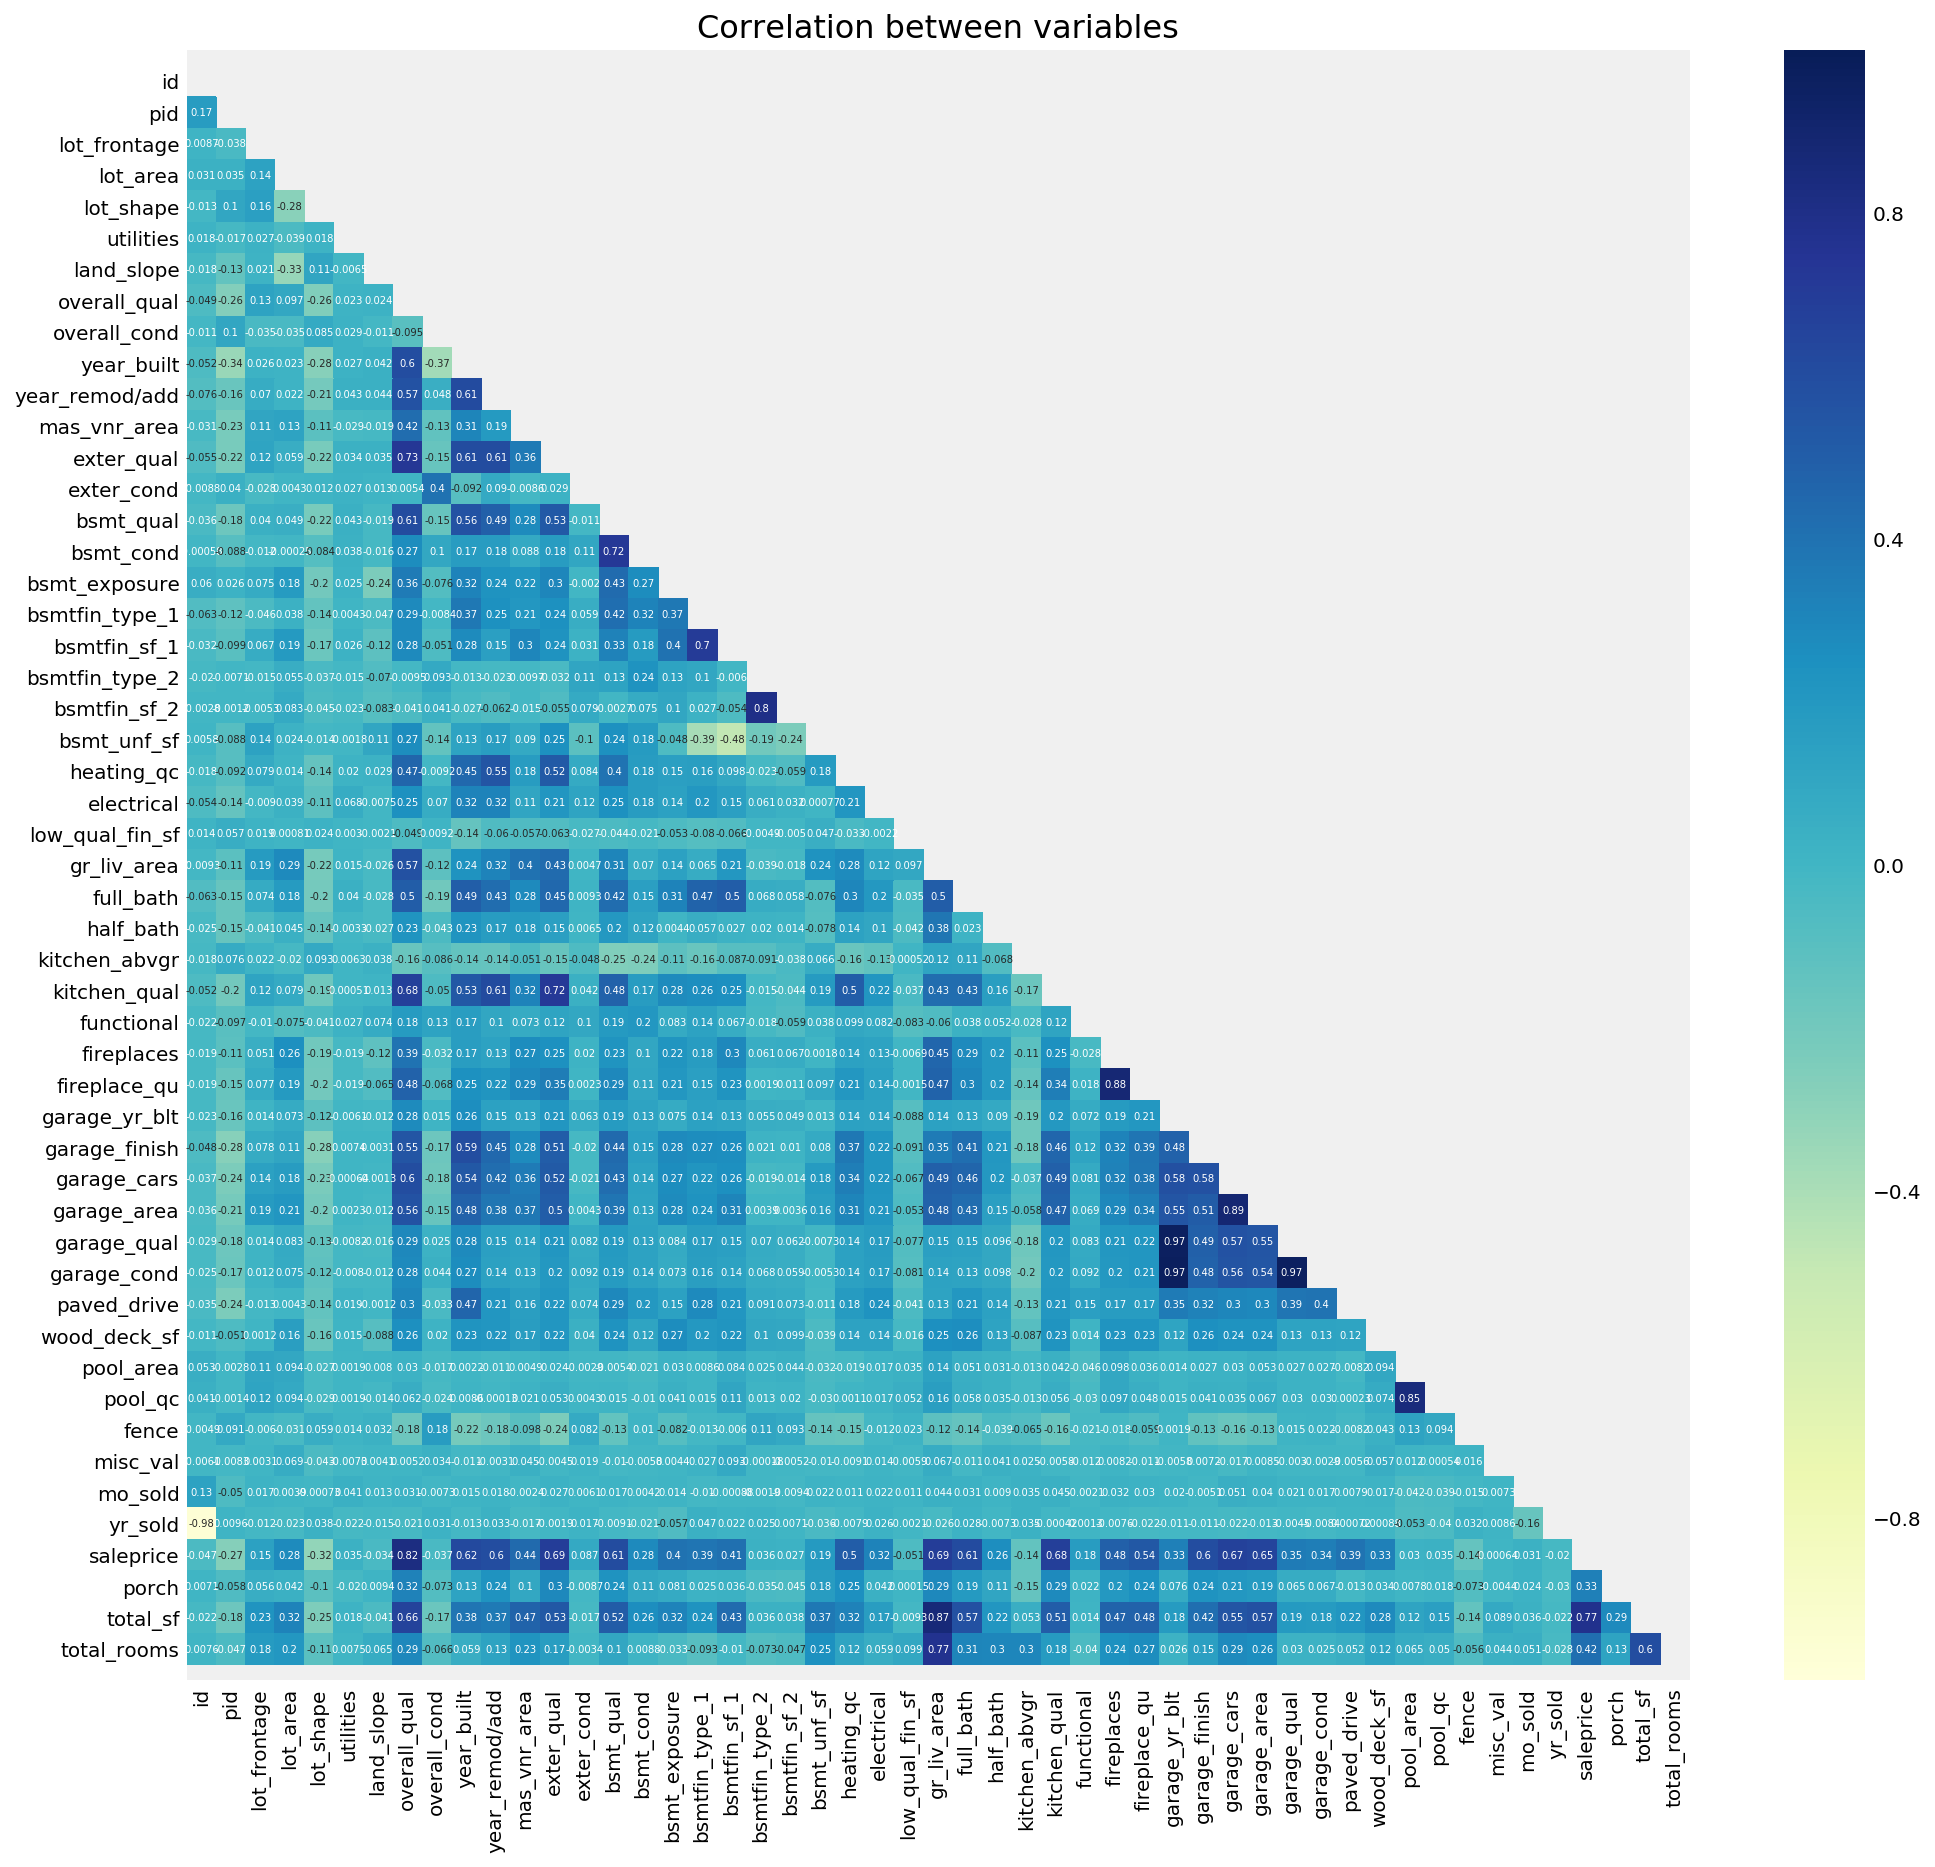

In [74]:
plt.figure(figsize=(15,15))
plt.title('Correlation between variables', fontsize = 16)

#to mask the top triangle of the heatmap which is not necessary
mask = np.zeros(combined.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

#plotting the heatmap for the combined dataset
ax = sns.heatmap(combined.corr(),mask=mask ,vmin = -1, vmax = 1, cmap="YlGnBu", center = 0, annot = True, annot_kws={"size": 5})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


Based on the heatmap, we can see that overall_qual, external_qual, gr_liv_area, kitchen_qual, garage_cars and garage_area had the highest correlations with sale prices. We will now proceed to preprocessing and modeling using the data we have cleaned. 

In [75]:
#save cleaned data 

combined.to_csv('data/trainer_tester_cleaned.csv')

### Modelling

#### Changing categorical data into dummies so they can be processed by models

In [76]:
cat_var = combined.select_dtypes(exclude=[np.number])

#dropping the 'original' column because it is an identifier and we do not need to process it
cat_var = cat_var.drop('original', axis = 1)
cat_features = cat_var.columns

In [77]:
#checking the remaining categorical features
cat_features

Index(['ms_subclass', 'ms_zoning', 'lot_config', 'neighborhood', 'house_style',
       'roof_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'foundation', 'garage_type'],
      dtype='object')

In [78]:
#getting dummies from categorical data so that they can be processed by models
combined = pd.get_dummies(combined, columns = cat_features, drop_first=True)

#confirming that dummies have been created by checking the number of columns
combined.shape

(2930, 163)

In [79]:
#Dividing back into test and train dataset
train = combined.loc[combined['original'] == 'train']
test = combined.loc[combined['original'] == 'test']

#removing 'original' column from both train and test set since the column is just an identifier
#removing salprice column from test set since it was not supposed to be there 
#...(but was added during concatenation)
test.drop(['original', 'saleprice'], axis = 1, inplace=True)
train.drop(['original'], axis = 1, inplace=True)

#confirming that we have the right number of rows and columns in the train and test sets
print(train.shape, test.shape)

(2051, 162) (879, 161)


C:\Users\elton\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Creating our train/test split and scaling

In [80]:
#create our features matrix X and target vector y
X = train.drop(['saleprice'], axis=1)
y = train['saleprice']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#scaling
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test) 


#### Linear Regression

In [81]:
#instantiate our model
lr = LinearRegression()

#finding r-squared scores for linear regression
lr_score = cross_val_score(lr, X_train_sc, y_train, cv=10)
lr_score.mean()

-2.011971384392486e+24

In [82]:
#finding root mean squared error for linear regression
lr_rmse = np.sqrt(-cross_val_score(lr, X_train_sc, y_train, scoring='neg_mean_squared_error')).mean()
lr_rmse

C:\Users\elton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


126284351159.5637

#### Lasso

In [83]:
#instantiate our model and find optimal alpha
lasso = LassoCV(n_alphas=500)

#fitting to lasso
lasso.fit(X_train_sc, y_train)

#input optimal alpha
lasso_opt = Lasso(lasso.alpha_)

#finding r-squared scores for lasso
lasso_score = cross_val_score(lasso_opt, X_train_sc, y_train)
lasso_score.mean()

C:\Users\elton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\elton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8271499511370527

In [84]:
#finding root mean squared error for lasso
lasso_rmse = np.sqrt(-cross_val_score(lasso_opt, X_train_sc, y_train, scoring='neg_mean_squared_error')).mean()
lasso_rmse

C:\Users\elton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.16670835016337796

#### Ridge

In [85]:
#instantiate our model and find optimal alpha
ridge_alphas=np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=ridge_alphas)

#fitting to ridge
ridge.fit(X_train_sc, y_train)

#input optimal alpha
ridge_opt= Ridge(alpha=ridge.alpha_)

#finding r-squared scores for ridge
ridge_score = cross_val_score(ridge_opt, X_train_sc, y_train)
ridge_score.mean()

C:\Users\elton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8593091291911374

In [86]:
#finding root mean squared error for ridge
ridge_rmse = np.sqrt(-cross_val_score(ridge_opt, X_train_sc, y_train, scoring='neg_mean_squared_error')).mean()
ridge_rmse

C:\Users\elton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.15170242869781717

Based on the highest r-squared value, and the lowest root mean-squared error, the ridge model best fits our data. We will use the ridge model to predict sale prices from our test set. 

#### Model Fitting and Evaluation

In [87]:
#fitting to ridge with our optimal alpha
ridge_opt.fit(X_train_sc, y_train);

#finding r-squared for our train set based on the 
#... ridge with optimal alpha which was derived from the train set
ridge_opt.score(X_train_sc, y_train)

0.90388093034006

In [88]:
#finding r-squared for our test set based on the 
#... ridge with optimal alpha which was derived from the train set
ridge_opt.score(X_test_sc, y_test)

0.8739722215095919

In [89]:
#calculating baseline rmse
(np.mean(np.square(y_test - np.mean(y_test)))) ** 0.5

0.42304949940893394

In [98]:
base_df= pd.DataFrame(y_test)
base_df['baseline']= np.mean(y_test)
base_df

saleprice   baseline
1124  11.794338  12.029106
188   12.328290  12.029106
1727  12.429216  12.029106
1658  11.759786  12.029106
1424  12.221749  12.029106
...         ...        ...
572   11.775290  12.029106
548   11.643954  12.029106
530   11.694413  12.029106
445   11.728037  12.029106
693   12.367885  12.029106

[513 rows x 2 columns]

In [99]:
r2_score(y_test, base_df.baseline)

0.0

In [90]:
#finding rmse for our test set based on the 
#... ridge with optimal alpha which was derived from the train set
ridge_opt_rmse = np.sqrt(-cross_val_score(ridge_opt, X_test_sc, y_test, scoring='neg_mean_squared_error')).mean()
ridge_opt_rmse

C:\Users\elton\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.1638912860946997

#### Inferential Visualisation

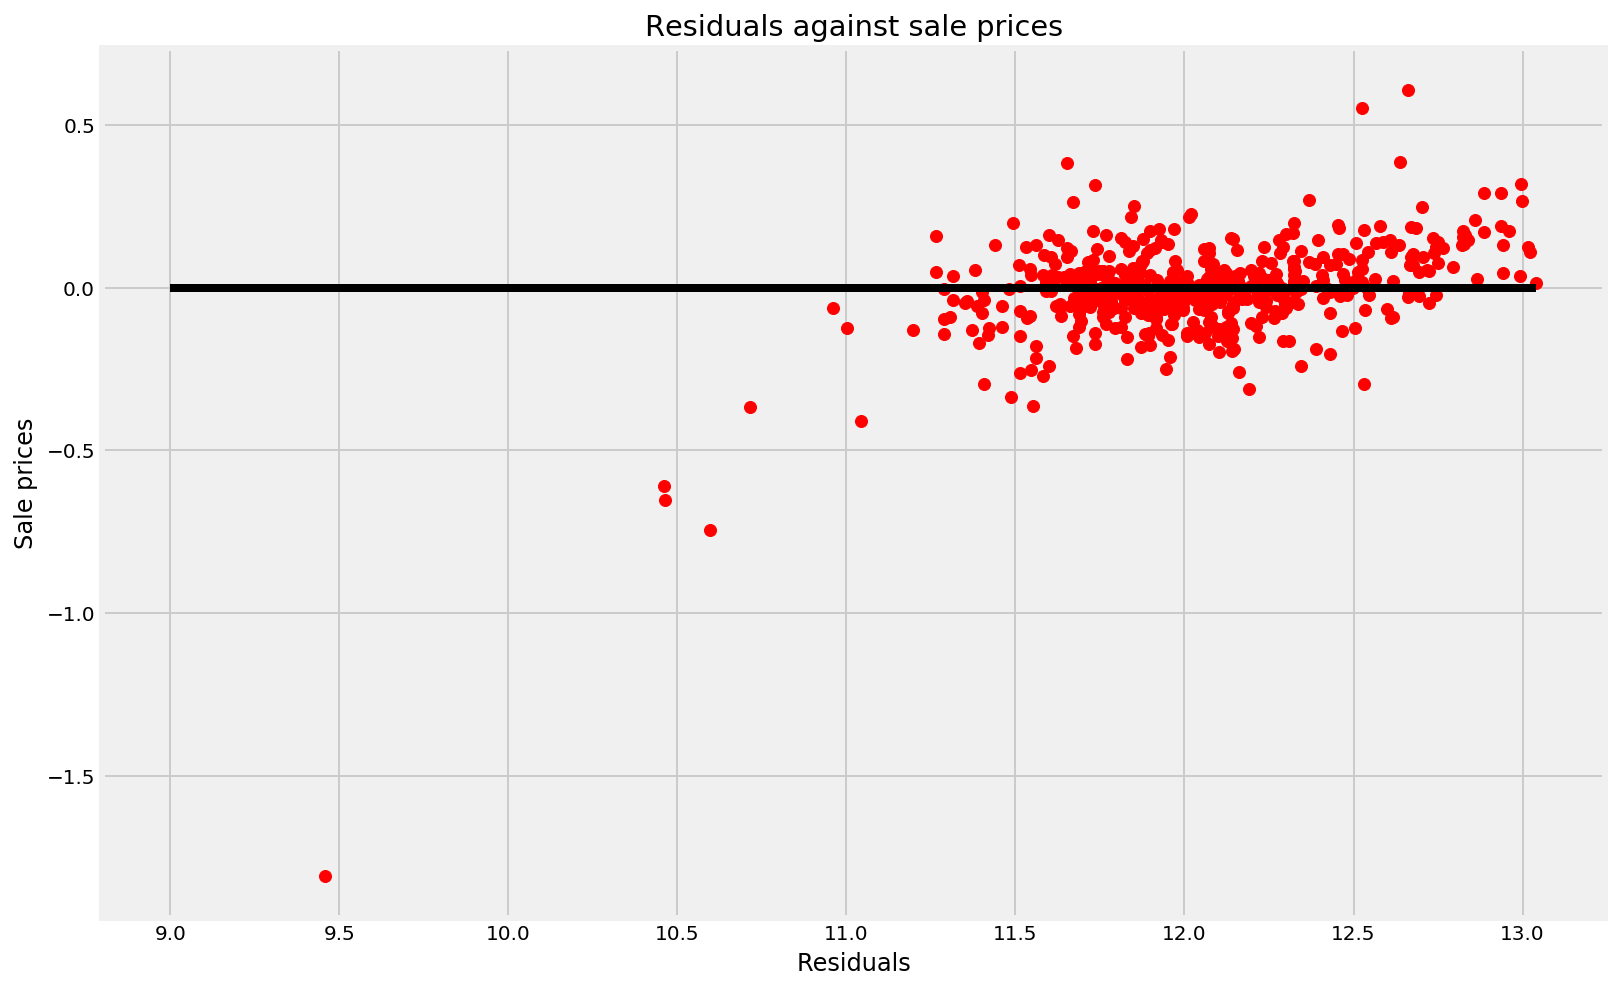

In [91]:
#residual plot
ridge_resid = y_test - ridge.predict(X_test_sc)

#Set figure size, title, x and y labels
plt.figure(figsize=(12,8))
plt.title('Residuals against sale prices')
plt.xlabel('Residuals')
plt.ylabel('Sale prices')

#Plot the scatter of residuals against the true values of sale price
plt.scatter(y=ridge_resid, x=y_test, c='r')

#Plot the line y=0
plt.plot([9,np.max(y_test)],[0,0], c='k');

The above residual plot shows that most of the differences between the true sale prices and predicted sale prices are clustered around 0, which indicates that our model is generally working. We will now use the model to predict sale prices from our test set. 

#### Predicting housing prices using optimal Ridge model

In [92]:
#scaling my test set according to X_train
test_sc = ss.transform(test)

In [93]:
#predicting saleprice from scaled test set using our preferred model
pred = ridge_opt.predict(test_sc)

In [94]:
#creating dataframe with predicted saleprices from test set
sub = pd.DataFrame()
sub['Id'] = test['id']
sub['Saleprice'] = np.exp(pred)

sub.to_csv('house_price_predictions.csv',index=False)

In [95]:
#checking the dataframe to make sure it is suitable for submission
sub.head()

Id      Saleprice
0  2658  120429.432559
1  2718  158181.785507
2  2414  221384.110495
3  1989  100453.171038
4   625  172055.910392

In [96]:
#checking the ridge coefficients to determine which variable had the greatest impact on sale prices
print('The coefficients are: \n')
ridge_coefs = pd.DataFrame({'variable':X_train.columns,
                         'coef':ridge.coef_})

ridge_coefs.sort_values('coef', ascending = False)


The coefficients are: 



variable      coef
7           overall_qual  0.046812
25           gr_liv_area  0.038543
48              total_sf  0.031778
26             full_bath  0.027224
49           total_rooms  0.024249
..                   ...       ...
87  neighborhood_MeadowV -0.013442
65     ms_zoning_C (all) -0.014055
81  neighborhood_Edwards -0.015403
42               pool_qc -0.015937
44              misc_val -0.016998

[161 rows x 2 columns]

**Kaggle Score**

The predicted prices were submitted on Kaggle and received a score of 35118, which is within the top 60 on the leaderboard. 

![](images/Kaggle.png)

### Conclusion and Recommendations

The features which added the most value to housing prices are: 
- Overall quality (rates the overall material and finish of the house)
- Ground living area (Above ground living area square feet)
- Total square feet (combination of first floor, second floor and basement area square feet)

The features which hurt the value of housing prices the most are: 
- Misc val (the value of miscellaneous features)
- Being in the Edwards neighborhood
- Being in a commercial zone

In order to increase the value of their houses, owners could consider improving the overall quality of the house by commencing renovation and upgrading works. This could include waterproofing, new coats of paint, stronger materials etc. Owners could also consider building additional floors if permitted, to increase the above total sqaure feet of the home across all levels and thereby increase space to live, work and play in. 

Buying houses in the Northridge Heights neighbourhood or Stone Brook neighbourhood would be good investments as being in those neighbourhoods added value to the houses. 

This model would likely generalise to other cities as overall quality, and total sqaure feet of the house across all room types, would be important to most homebuyers even in different cities. In order to make the model even more universal, we could consider removing features which are specific to Ames, Iowa such as the specific neighbourhoods. In order to make a comparable model for another city, we could collect more data on race, income, age, occupation, political affiliation, neighbourhood etc. to consider how these various factors might affect the prices of houses across neighbourhoods in the other city. 